#### Importar as bibliotecas

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
# Carregando os arquivos

CaminhoArquivo = './Arquivos/horasDeEstudo.csv'
dados = pd.read_csv(CaminhoArquivo)

In [29]:
#cabeçalho
dados.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [30]:
#ultima linha
dados.tail()

,horas_estudo_mes,salario
495,58.0,6259.0
496,34.0,6099.0
497,47.0,6170.0
498,37.0,5064.0
499,29.0,5236.0


In [31]:
# tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


4.
Gerar uma análise exploratória dos dados:
a.

In [32]:
# a.Verificar se há dados nulos e mostrar a quantidade; 
# False = não tem nulo, True = tem nulo
dados.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [33]:
# RESUMO ESTATÍSTICOS DO DATAFRAME

dados.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [34]:
# ANALISAR A CORRELAÇÃO ENTRE AS VARIÁVEIS

dados.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


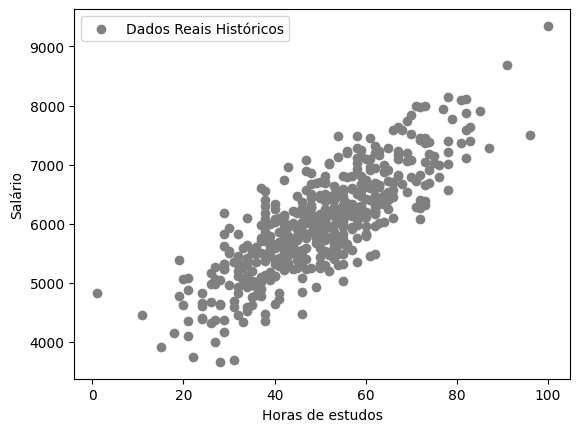

In [35]:
# CRIAR UM GRÁFICO DE DISPERSÃO

plt.scatter(
    data=dados, # CONJUNTO DE DADOS
    x = 'horas_estudo_mes', # VARIÁVEL PREDITORA
    y = 'salario', # VARIÁVEL RESPOSTA
    label = 'Dados Reais Históricos', # RÓTULO
    color = 'gray' #COR
    )

plt.xlabel('Horas de estudos')
plt.ylabel('Salário')
plt.legend()
    

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

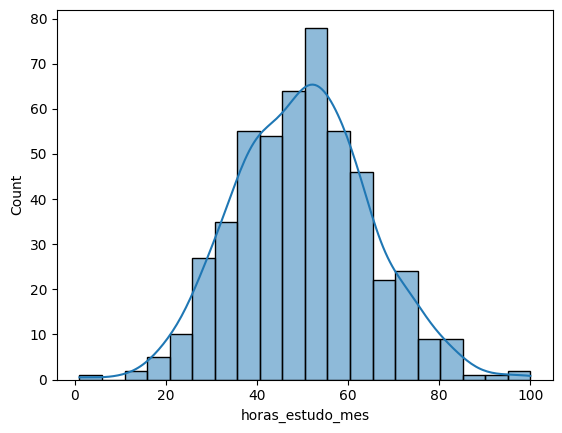

In [36]:
# CONSTRUIR UM HISOGRAMA PARA ANALISAR O COMPORTAMENTO
# DA VARIÁVEL PREDITORA (horas_estudo_mes)

sns.histplot(
    data = dados, #CONJUNTO DE DADOS
    x = 'horas_estudo_mes', # VARIÁVEL X
    kde = True # CURVA
)



## PREPARAR OS DADOS

In [37]:
# SEPARAR AS VARIÁVEIS 

x = dados['horas_estudo_mes']
y = dados['salario']

# VERICICAR O TIPO DE DADOS E QTDE DE ELEMENTOS
print(f'O tipo de dado da variável X é {type(x)}') # pandas.core.series.Series = coluna
print(f'A quantidade de dados da variável X é {len(x)}')

O tipo de dado da variável X é <class 'pandas.core.series.Series'>
A quantidade de dados da variável X é 500


In [38]:
# CONVERTER A VARIÁVEL X PARA UMA MATRIZ 1X1

x = np.array(x)

# NP.RESHAPE(LINHAS, COLUNAS)

x = x.reshape(-1,1)
x

array([[ 57.],
       [ 48.],
       [ 60.],
       [ 73.],
       [ 46.],
       [ 46.],
       [ 74.],
       [ 62.],
       [ 43.],
       [ 58.],
       [ 43.],
       [ 43.],
       [ 54.],
       [ 21.],
       [ 24.],
       [ 42.],
       [ 35.],
       [ 55.],
       [ 36.],
       [ 29.],
       [ 72.],
       [ 47.],
       [ 51.],
       [ 29.],
       [ 42.],
       [ 52.],
       [ 33.],
       [ 56.],
       [ 41.],
       [ 46.],
       [ 41.],
       [ 78.],
       [ 50.],
       [ 34.],
       [ 62.],
       [ 32.],
       [ 53.],
       [ 21.],
       [ 30.],
       [ 53.],
       [ 61.],
       [ 53.],
       [ 48.],
       [ 45.],
       [ 28.],
       [ 39.],
       [ 43.],
       [ 66.],
       [ 55.],
       [ 24.],
       [ 55.],
       [ 44.],
       [ 40.],
       [ 59.],
       [ 65.],
       [ 64.],
       [ 37.],
       [ 45.],
       [ 55.],
       [ 65.],
       [ 43.],
       [ 47.],
       [ 33.],
       [ 32.],
       [ 62.],
       [ 70.],
       [ 4

In [40]:
# SEPARAR OS DADOS EM TREINO E TESTE


x_train, x_test, y_train, y_test = train_test_split(x, y, # VARIÁVEIS DE ESTUDO
                                                     test_size = 0.2, # TAMANHO DO TESTE
                                                       random_state= 42) # random_state =  divisão de grupos, 

print('Qtde de elementos para treino', len(x_train))
print('Qtde de elementos para teste:', len(x_test))
print('Qtde de elementos total:', len(x))

Qtde de elementos para treino 400
Qtde de elementos para teste: 100
Qtde de elementos total: 500


### ETAPA 07: Treinar o modelo

In [41]:
# INICIALIZAR O ALGORITMO PARA TREINO

modelo = LinearRegression()

# TREINAR O MODELO

modelo.fit(x_train, y_train)

LinearRegression()

In [43]:
# Exibir os coeficientes

print('Coeficiente angular angular (a):', modelo.coef_)
print('Coeficiente Linear (b):', modelo.intercept_)

# A formula de calculo = y = ax + b



Coeficiente angular angular (a): [48.18185277]
Coeficiente Linear (b): 3596.783724372753


### DEPLOY DO MODELO:

In [48]:
# INSERIR OS VALORES PARA PREVISÃO

entrada = int(input('Digite a qtde de horas dedicadas'))
horasEstudo = np.array([[entrada]])

# REALIZAR A PREVISÃO
salario = modelo.predict(horasEstudo)

# A formula de calculo da previsão será: y = ax + b ->> y = salario, a = 48,2, x = 50 (horasTrab), b = 3696

print(f'Para {horasEstudo[0][0]} horas aplicadas ao estudo'+
      f'\ntem uma probabilidade de você ter um salário de aproximadamente de R${salario[0]}')

Para 96 horas aplicadas ao estudo
tem uma probabilidade de você ter um salário de aproximadamente de 8222.241590430644
